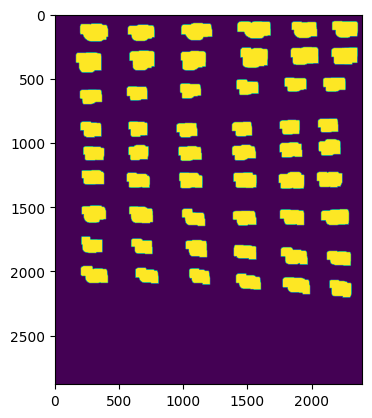

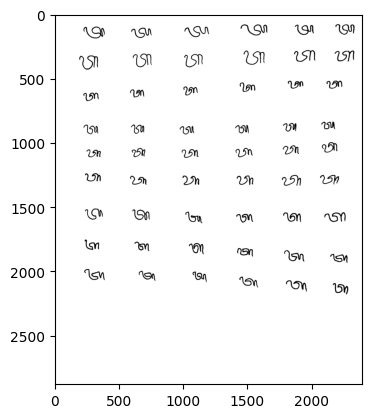

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def cropping_image(image_location, index):
    # import the  image
    image = cv2.imread(f"{image_location}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # creating  a binary thresholded image
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # erosion
    kernel = np.ones((5, 5), np.uint8)
    erosion = cv2.erode(binary, kernel, iterations=1)

    # dilation
    kernel0 = np.ones((53, 57), np.uint8)
    dilation = cv2.dilate(erosion, kernel0, iterations=1)

    # additional img processing if needed
    plt.imshow(dilation)
    plt.show()

    # find contours from the thresholded image
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Make destination path and change the for each aksara
    folder_path = f'/content/drive/MyDrive/dataset/hasil/ta'  #change the last element of the path to save every aksara in  correct folder name
    os.makedirs(folder_path, exist_ok=True)

    i = 0
    for item in contours:
        x, y, w, h = cv2.boundingRect(item)
        #  Make preview image before cropping and detect by box
        #cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,0), 10, cv2.LINE_AA)

        # crop objects
        # Please change filename of image
        cv2.imwrite(f'{folder_path}/imageds_{i}.jpg', image[y:y + h, x:x + w])
        i += 1

    plt.imshow(image)
    plt.show()

image_location = "/content/drive/MyDrive/dataset/ta_1.jpg"#(change the file location )

for i in range(1):
    cropping_image(image_location, i + 1)